In [1]:
# autoreload
%load_ext autoreload
%autoreload 2


In [2]:
from utils.pianoroll import PianoRoll
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pr = PianoRoll.from_midi('../../log/ema_0.9999_2700000/0.mid')

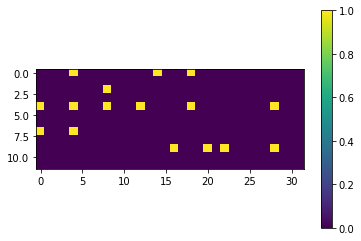

In [26]:
ch = pr.to_tensor(chromagram=True)>0
plt.imshow(ch[:32].t())
plt.colorbar()

In [34]:
def sim_mat(x):
    return x @ x.t() 

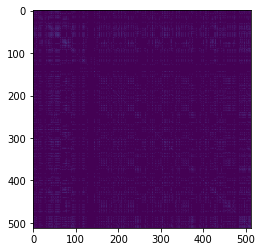

In [35]:
plt.imshow(sim_mat(ch).t())

In [36]:
fitness = sim_mat(ch).t().sum(1)

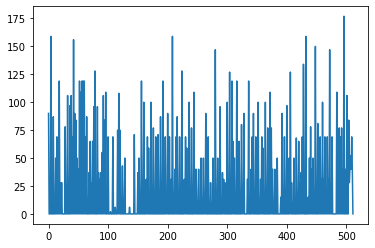

In [37]:
plt.plot(fitness)

In [25]:
n = len(fitness)
inv_scape = np.zeros((n, n))
inv_fitness = 1/fitness/300
inv_scape[0] = inv_fitness
for l in range(n):
    for m in range(n-l):
        inv_scape[l, m] = inv_scape[l-1, m] + inv_fitness[m+l]
for l in range(n):
    inv_scape[l]/=l+1

In [ ]:
print(inv)

tensor(0., dtype=torch.float64) tensor(100000.0000, dtype=torch.float64)


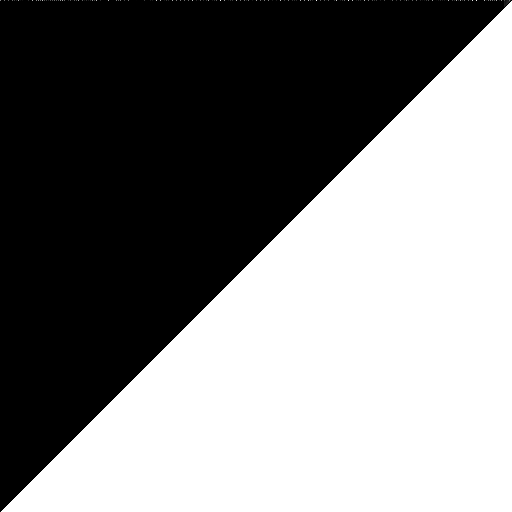

In [23]:
import io
import PIL.Image
import torchvision.transforms.functional as TF
import torch
def fig_to_pil(fig):
    plt.axis('off')
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    buf = io.BytesIO()
    
    fig.savefig(buf,pad_inches =0)
    buf.seek(0)
    return PIL.Image.open(buf)

#(1.23205 | -1.23205 | 1.73205 -0.366025 | -1.36603 | 1.36603)
scape = TF.to_tensor(1.0/(inv_scape+0.00001))
print(scape.min(), scape.max())
scape = torch.cat([scape,scape,scape])
img = TF.to_pil_image((scape).clamp(0,1))
#img.transform(img.size,PIL.Image.AFFINE,[1,0,0,0,-1,img.size[1]]).transform(img.size,PIL.Image.AFFINE,[1,1,0,0,1,0])
img


In [122]:
TF.torch.tensor(scape).shape

/tmp/ipykernel_1188791/1751813785.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  TF.torch.tensor(scape).shape


torch.Size([4, 512, 512])

In [123]:

scape.shape

torch.Size([4, 512, 512])